In [265]:
import pandas as pd
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt


In [243]:
def fractionToDecimal(fraction):
    try:
        return float(sum(Fraction(part) for part in fraction.split()))
    except ValueError:
        return None

In [244]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-26/boston_cocktails.csv"                 

In [245]:
df = pd.read_csv(url)
df

,name,category,row_id,ingredient_number,ingredient,measure
0,Gauguin,Cocktail Classics,1,1,Light Rum,2 oz
1,Gauguin,Cocktail Classics,1,2,Passion Fruit Syrup,1 oz
2,Gauguin,Cocktail Classics,1,3,Lemon Juice,1 oz
3,Gauguin,Cocktail Classics,1,4,Lime Juice,1 oz
4,Fort Lauderdale,Cocktail Classics,2,1,Light Rum,1 1/2 oz
...,...,...,...,...,...,...
3638,Vow Of Silence,Gin,990,2,Grapefruit Juice,3/4 oz
3639,Vow Of Silence,Gin,990,3,Fresh Lime Juice,1/2 oz
3640,Vow Of Silence,Gin,990,4,Yellow Chartreuse,1/2 oz
3641,Vow Of Silence,Gin,990,5,Amaro,1/4 oz


In [246]:
df['measure'].unique()

array(['2 oz', '1 oz', '1 1/2 oz', '1/2 oz', '1/4 oz', '3 oz', '1 1/4 oz',
       '3/4 oz', '2 1/2 oz', '5 oz', '1', '1 dash', '1 2/3 oz', '1/3 oz',
       '4 oz', '6', '1 3/4 oz', '1/2 or 1', '2 1/4 oz', '5 or 6', '6 oz',
       'For glass', '1/2 tsp', '24 oz', '1c', '1 tsp', '2 bottles', '2',
       '2 750-ml', '25', '5', '1 750-ml', '3 slices', '16 oz', '6 Fresh',
       '7', '2 -  3 drops', 'splash', '12', '2 dashes', '1  3/4 oz',
       '1 splash'], dtype=object)

In [247]:
# pivoted_df = df.pivot_table(index='name', 
#                             columns='ingredient_number', 
#                             values=['ingredient', 'measure'], 
#                             aggfunc='first')
# pivoted_df

In [248]:
fracCount = df['measure'].str.contains('/').sum()
totalCount = df['measure'].count()
print(f"Fraciton count: {fracCount} \nTotal Count: {totalCount}")

Fraciton count: 1950 
Total Count: 3643


In [249]:
val = df[df['measure'] == 'For glass'].count()
print(val)

name                 19
category             19
row_id               19
ingredient_number    19
ingredient           19
measure              19
dtype: int64


In [250]:
# df['measure'] = df['measure'].replace(" oz", "").str.strip()
# df['measure'] = df['measure'].apply(fractionToDecimal)
# df['measure']

In [251]:
measure_dummies = pd.get_dummies(df[['ingredient', 'measure']])
concat_df = pd.concat([df, measure_dummies], axis=1)
concat_df.drop(['ingredient', 'measure', 'ingredient_number'], axis=1, inplace=True)
concat_df

,name,category,row_id,ingredient_100-proof Vodka,ingredient_151-Proof Rum,ingredient_17-year-old J. Wray and Nephew Ltd. Rum,ingredient_7-Up,ingredient_Absinthe,ingredient_Absinthe Substitute,ingredient_Absinthe or pastis,...,measure_4 oz,measure_5,measure_5 or 6,measure_5 oz,measure_6,measure_6 Fresh,measure_6 oz,measure_7,measure_For glass,measure_splash
0,Gauguin,Cocktail Classics,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Gauguin,Cocktail Classics,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gauguin,Cocktail Classics,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gauguin,Cocktail Classics,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fort Lauderdale,Cocktail Classics,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,Vow Of Silence,Gin,990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3639,Vow Of Silence,Gin,990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3640,Vow Of Silence,Gin,990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3641,Vow Of Silence,Gin,990,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
df = concat_df.groupby(['name', 'category', 'row_id']).sum()

df.reset_index(inplace=True)
df

,name,category,row_id,ingredient_100-proof Vodka,ingredient_151-Proof Rum,ingredient_17-year-old J. Wray and Nephew Ltd. Rum,ingredient_7-Up,ingredient_Absinthe,ingredient_Absinthe Substitute,ingredient_Absinthe or pastis,...,measure_4 oz,measure_5,measure_5 or 6,measure_5 oz,measure_6,measure_6 Fresh,measure_6 oz,measure_7,measure_For glass,measure_splash
0,1626,Whiskies,433,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19th Century,Whiskies,431,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A. J.,Cocktail Classics,657,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Absinthe Cocktail,Cocktail Classics,436,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Absinthe Drip Cocktail,Cocktail Classics,661,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,Yokahama Romance,Gin,969,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,Yolanda,Cocktail Classics,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,Zaza Cocktail,Cocktail Classics,595,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
987,Zero Mint,Cocktail Classics,828,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
# is_unique = df['row_id'].nunique() == len(df)
# is_unique
# df.set_index('row_id', inplace=True)
# df

category_dummies = pd.get_dummies(df['category'])
df = pd.concat([df, category_dummies], axis=1)
df.columns

Index(['name', 'category', 'row_id', 'ingredient_100-proof Vodka',
       'ingredient_151-Proof Rum',
       'ingredient_17-year-old J. Wray and Nephew Ltd. Rum', 'ingredient_7-Up',
       'ingredient_Absinthe', 'ingredient_Absinthe Substitute',
       'ingredient_Absinthe or pastis',
       ...
       'Cocktail Classics', 'Cordials and Liqueurs', 'Gin',
       'Non-alcoholic Drinks', 'Rum', 'Rum - Daiquiris', 'Shooters', 'Tequila',
       'Vodka', 'Whiskies'],
      dtype='object', length=625)

In [254]:
df.drop(['category', 'row_id'], axis=1, inplace=True)
# df.set_index('row_id', inplace=True)
df

,name,ingredient_100-proof Vodka,ingredient_151-Proof Rum,ingredient_17-year-old J. Wray and Nephew Ltd. Rum,ingredient_7-Up,ingredient_Absinthe,ingredient_Absinthe Substitute,ingredient_Absinthe or pastis,ingredient_Acai berry flavored vodka,ingredient_African rum,...,Cocktail Classics,Cordials and Liqueurs,Gin,Non-alcoholic Drinks,Rum,Rum - Daiquiris,Shooters,Tequila,Vodka,Whiskies
0,1626,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,19th Century,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A. J.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Absinthe Cocktail,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Absinthe Drip Cocktail,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,Yokahama Romance,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
985,Yolanda,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
986,Zaza Cocktail,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
987,Zero Mint,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [255]:
df.describe()

,ingredient_100-proof Vodka,ingredient_151-Proof Rum,ingredient_17-year-old J. Wray and Nephew Ltd. Rum,ingredient_7-Up,ingredient_Absinthe,ingredient_Absinthe Substitute,ingredient_Absinthe or pastis,ingredient_Acai berry flavored vodka,ingredient_African rum,ingredient_Agave nectar,...,Cocktail Classics,Cordials and Liqueurs,Gin,Non-alcoholic Drinks,Rum,Rum - Daiquiris,Shooters,Tequila,Vodka,Whiskies
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,...,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,0.001011,0.005056,0.001011,0.001011,0.008089,0.007078,0.004044,0.001011,0.001011,0.010111,...,0.472194,0.008089,0.017189,0.001011,0.001011,0.112235,0.002022,0.087968,0.139535,0.111223
std,0.031798,0.070959,0.031798,0.031798,0.100279,0.083874,0.063500,0.031798,0.031798,0.100096,...,0.499479,0.089620,0.130041,0.031798,0.031798,0.315815,0.044947,0.283391,0.346679,0.314568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [266]:
ingredient_cols = [col for col in df.columns if col.startswith('ingredient_')]
most_common_ingredient = df[ingredient_cols].mean().idxmax()
most_common_ingredient

'ingredient_Gin'

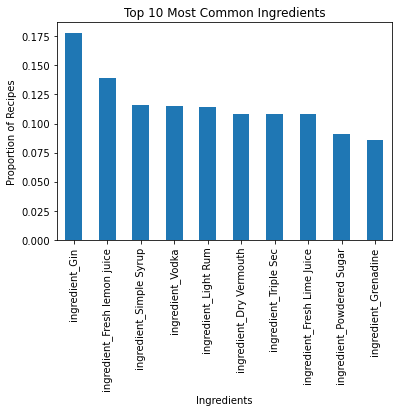

In [267]:
ingredient_means = df[ingredient_cols].mean()

ingredient_means.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Most Common Ingredients')
plt.ylabel('Proportion of Recipes')
plt.xlabel('Ingredients')
plt.show()